# Africa Economic, Banking & Systematic Crisis Data - Visualisation Study

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load Data

In [25]:
data = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/african_crises.csv")
data.head()

case  cc3  country  year  systemic_crisis  exch_usd  \
0     1  DZA  Algeria  1870                1  0.052264   
1     1  DZA  Algeria  1871                0  0.052798   
2     1  DZA  Algeria  1872                0  0.052274   
3     1  DZA  Algeria  1873                0  0.051680   
4     1  DZA  Algeria  1874                0  0.051308   

   domestic_debt_in_default  sovereign_external_debt_default  \
0                         0                                0   
1                         0                                0   
2                         0                                0   
3                         0                                0   
4                         0                                0   

   gdp_weighted_default  inflation_annual_cpi  independence  currency_crises  \
0                   0.0              3.441456             0                0   
1                   0.0             14.149140             0                0   
2                   0.0             -3.718593             0                0   
3                   0.0             11.203897             0                0   
4                   0.0             -3.848561             0                0   

   inflation_crises banking_crisis  
0                 0         crisis  
1                 0      no_crisis  
2                 0      no_crisis  
3                 0      no_crisis  
4                 0      no_crisis

In [3]:
data.shape

(1059, 14)

In [4]:
data.describe()

case         year  systemic_crisis     exch_usd  \
count  1059.000000  1059.000000      1059.000000  1059.000000   
mean     35.613787  1967.767705         0.077432    43.140831   
std      23.692402    33.530632         0.267401   111.475380   
min       1.000000  1860.000000         0.000000     0.000000   
25%      15.000000  1951.000000         0.000000     0.195350   
50%      38.000000  1973.000000         0.000000     0.868400   
75%      56.000000  1994.000000         0.000000     8.462750   
max      70.000000  2014.000000         1.000000   744.306139   

       domestic_debt_in_default  sovereign_external_debt_default  \
count               1059.000000                      1059.000000   
mean                   0.039660                         0.152975   
std                    0.195251                         0.360133   
min                    0.000000                         0.000000   
25%                    0.000000                         0.000000   
50%                    0.000000                         0.000000   
75%                    0.000000                         0.000000   
max                    1.000000                         1.000000   

       gdp_weighted_default  inflation_annual_cpi  independence  \
count           1059.000000          1.059000e+03   1059.000000   
mean               0.006402          2.084889e+04      0.776204   
std                0.043572          6.757274e+05      0.416984   
min                0.000000         -2.850214e+01      0.000000   
25%                0.000000          2.086162e+00      1.000000   
50%                0.000000          5.762330e+00      1.000000   
75%                0.000000          1.164405e+01      1.000000   
max                0.400000          2.198970e+07      1.000000   

       currency_crises  inflation_crises  
count      1059.000000       1059.000000  
mean          0.132200          0.129367  
std           0.349847          0.335765  
min           0.000000          0.000000  
25%           0.000000          0.000000  
50%           0.000000          0.000000  
75%           0.000000          0.000000  
max           2.000000          1.000000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

## Explore the Data

In [12]:
# How many countries are in the dataset
data["country"].unique()

array(['Algeria', 'Angola', 'Central African Republic', 'Ivory Coast',
       'Egypt', 'Kenya', 'Mauritius', 'Morocco', 'Nigeria',
       'South Africa', 'Tunisia', 'Zambia', 'Zimbabwe'], dtype=object)

## Year Wise Average USD Exchange Rate of Each Country

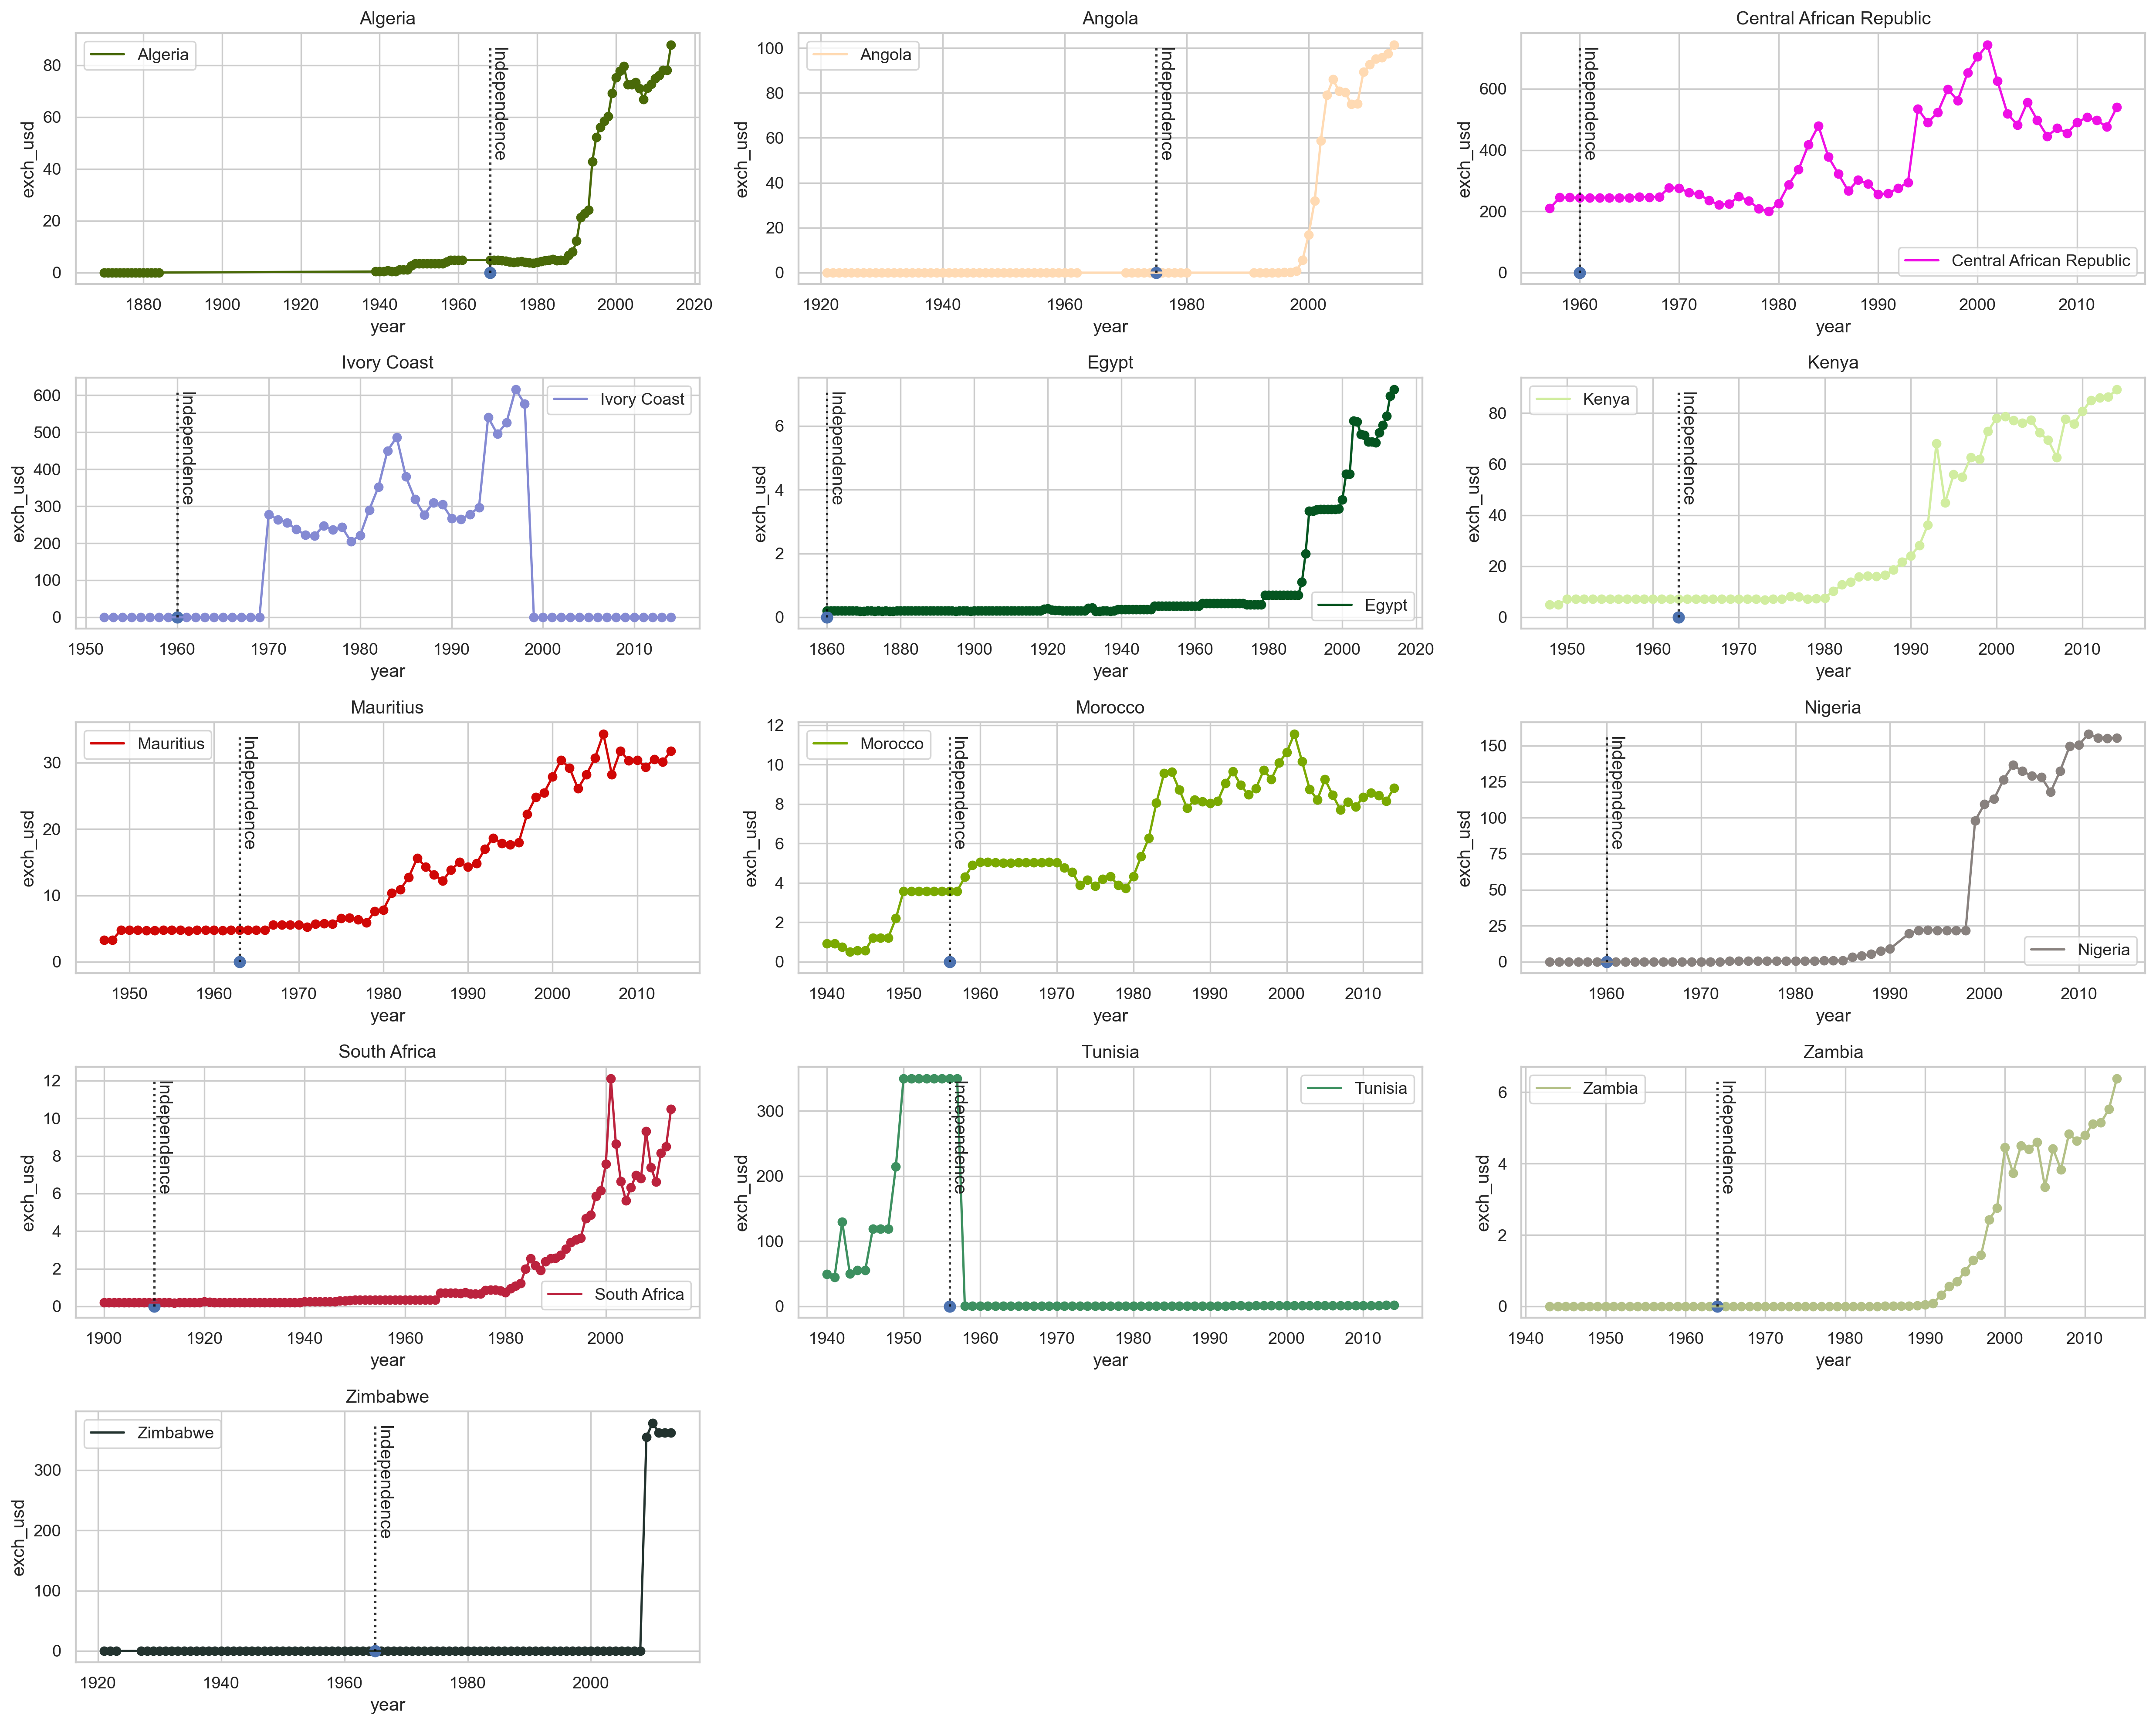

In [10]:
import random

sns.set(style='whitegrid')
plt.figure(figsize=(20,16), dpi=250)
count=1
countries = data["country"].unique()

for country in countries:
    plt.subplot(5,3,count)
    count+=1
    col="#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    sns.lineplot(x=data[data["country"]==country]['year'],y=data[data["country"]==country]['exch_usd'],label=country,color=col)
    plt.scatter(x=data[data["country"]==country]['year'],
                y=data[data["country"]==country]['exch_usd'],
                color=col,
                s=28)
    plt.plot([np.min(data[np.logical_and(data["country"]==country,data["independence"]==1)]['year']),
              np.min(data[np.logical_and(data["country"]==country,data["independence"]==1)]['year'])],
             [0,
              np.max(data[data.country==country]['exch_usd'])],
             color='black',
             linestyle='dotted',
             alpha=0.8)
    plt.text(np.min(data[np.logical_and(data["country"]==country,data["independence"]==1)]['year']),
             np.max(data[data["country"]==country]['exch_usd'])/2,
             'Independence',
             rotation=-90)
    plt.scatter(x=np.min(data[np.logical_and(data["country"]==country,data["independence"]==1)]['year']),
                y=0,
                s=50)
    plt.title(country)

plt.tight_layout()
plt.show()


## Different Types of Debt Count of Each Country

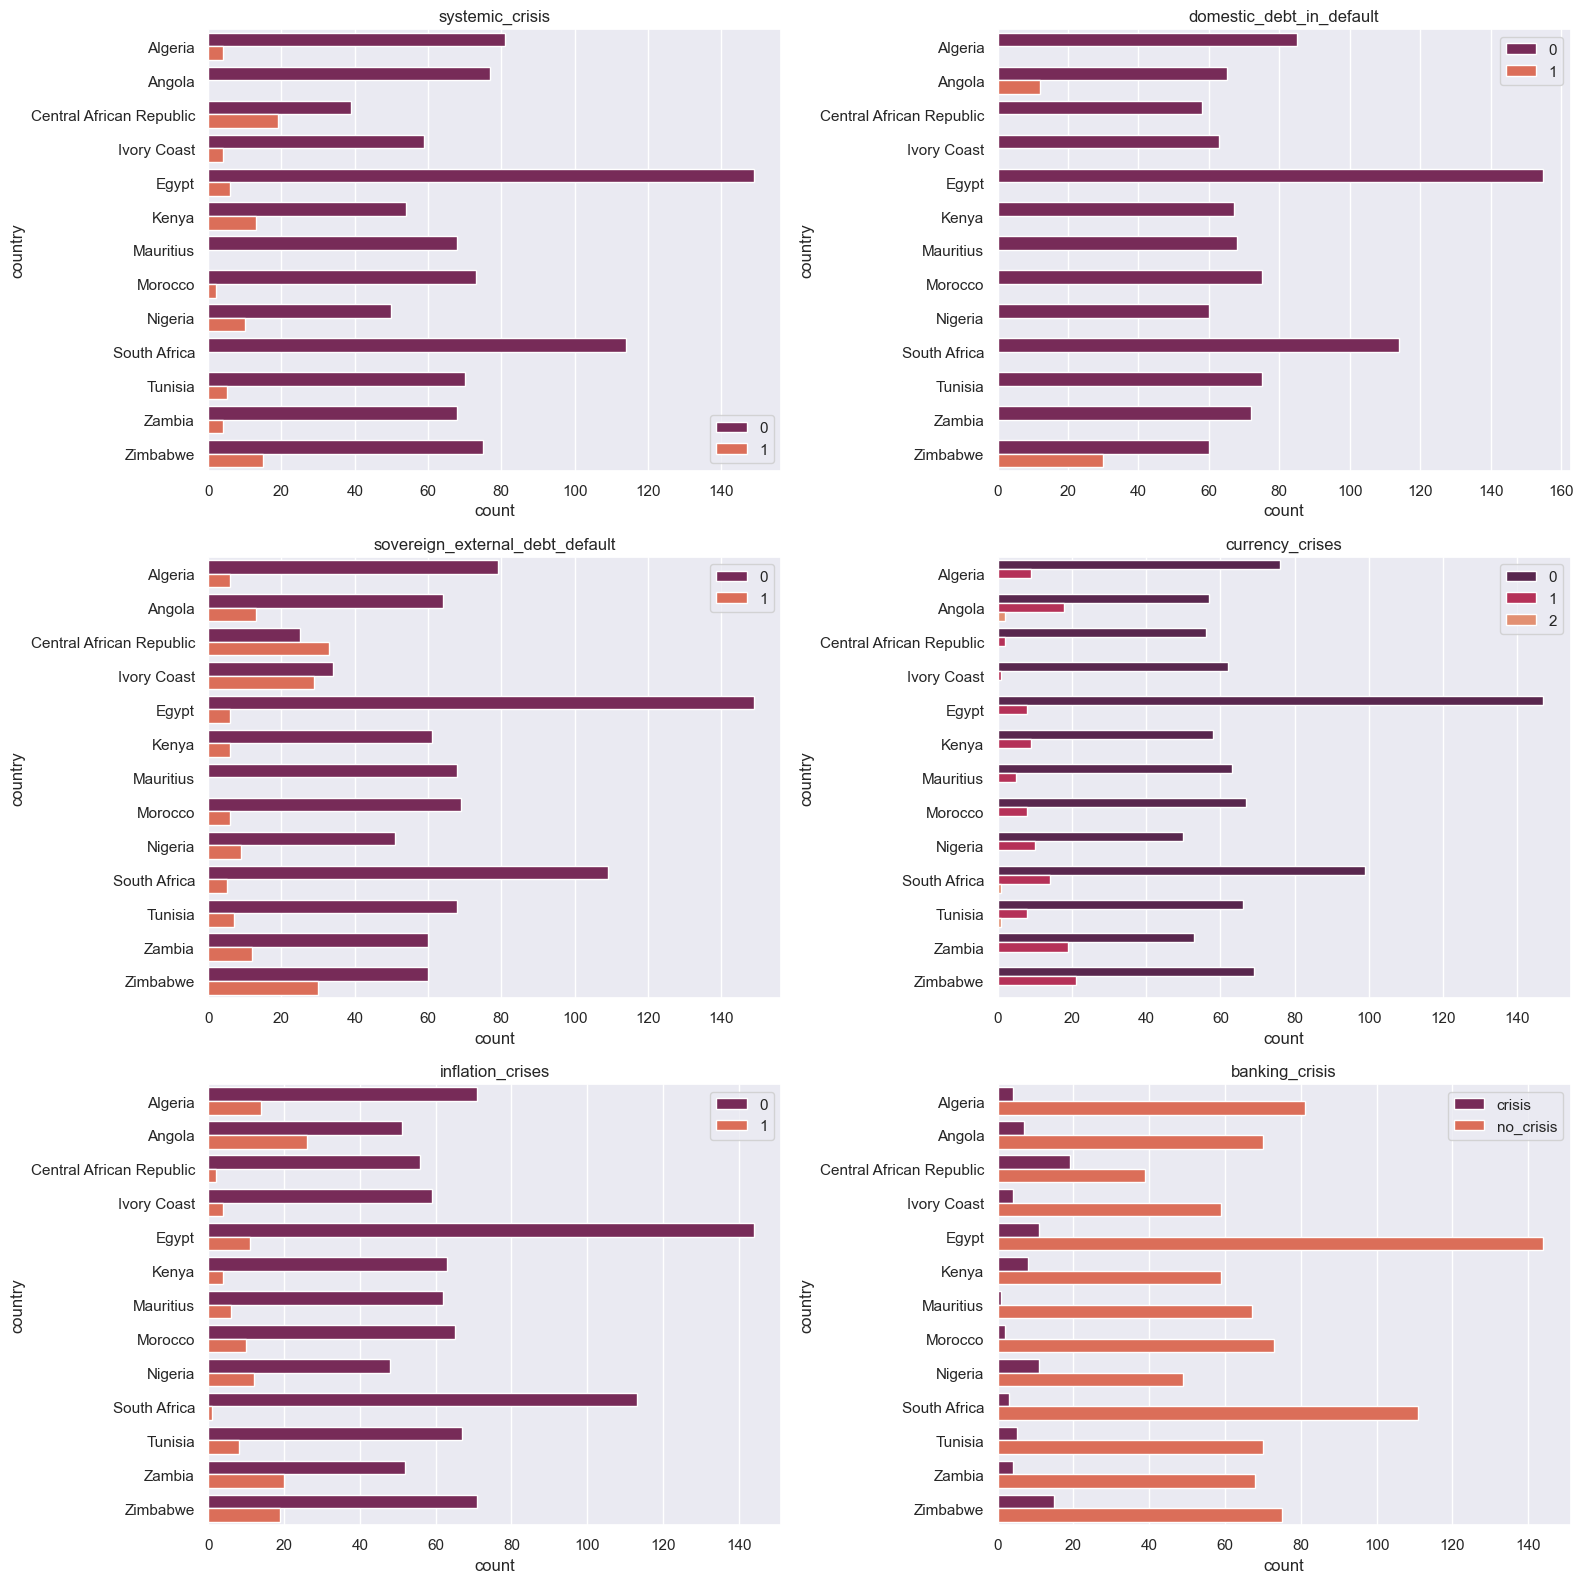

In [15]:
sns.set(style="darkgrid")
cols = ["systemic_crisis", "domestic_debt_in_default", "sovereign_external_debt_default", "currency_crises", "inflation_crises", "banking_crisis"]
plt.figure(figsize=(16,16))
count=1

for column in cols:
    plt.subplot(3,2,count)
    count+=1
    sns.countplot(y=data["country"], hue=data[column], palette="rocket")
    plt.legend(loc=0)
    plt.title(column)
plt.tight_layout()
plt.show()

In [26]:
# There seems to be values of 2 in currency crisis.
data[data["currency_crises"]==2]

case  cc3       country  year  systemic_crisis  exch_usd  \
142     2  AGO        Angola  1995                0  0.005692   
146     2  AGO        Angola  1999                0  5.579920   
775    56  ZAF  South Africa  1967                0  0.709300   
840    63  TUN       Tunisia  1958                0  0.419700   

     domestic_debt_in_default  sovereign_external_debt_default  \
142                         1                                1   
146                         1                                1   
775                         0                                0   
840                         0                                1   

     gdp_weighted_default  inflation_annual_cpi  independence  \
142                  0.00           2672.230000             1   
146                  0.00            248.248000             1   
775                  0.00              2.151508             1   
840                  0.06              5.216941             1   

     currency_crises  inflation_crises banking_crisis  
142                2                 1         crisis  
146                2                 1      no_crisis  
775                2                 0      no_crisis  
840                2                 0      no_crisis

In [35]:
# Let's drop these rows
data.drop(data[data["currency_crises"] == 2].index, inplace=True)
data[data["currency_crises"]==2]

Empty DataFrame
Columns: [case, cc3, country, year, systemic_crisis, exch_usd, domestic_debt_in_default, sovereign_external_debt_default, gdp_weighted_default, inflation_annual_cpi, independence, currency_crises, inflation_crises, banking_crisis]
Index: []

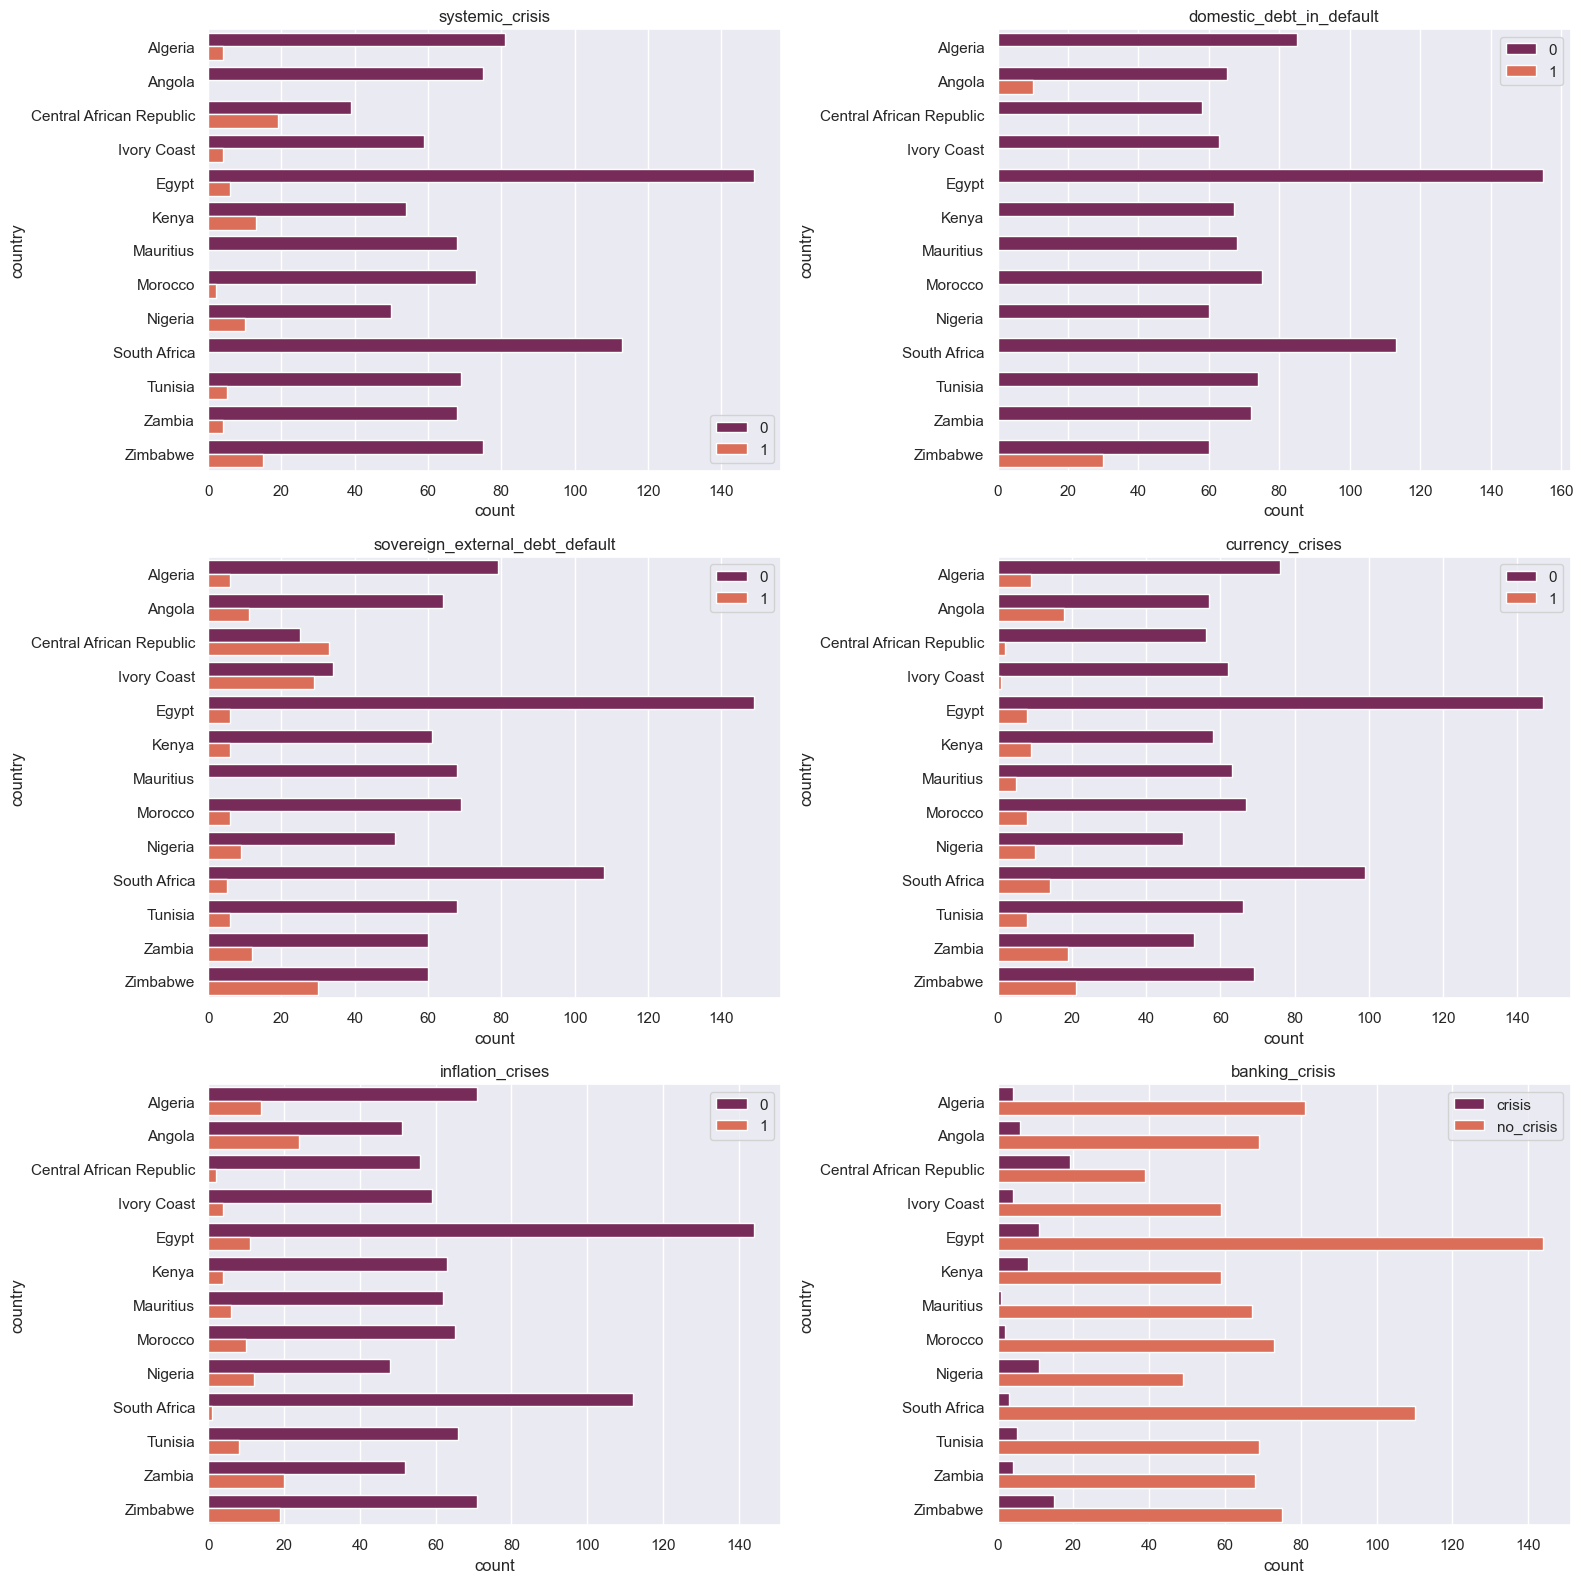

In [36]:
# lets plot the debt counts again with the new df

sns.set(style="darkgrid")
cols = ["systemic_crisis", "domestic_debt_in_default", "sovereign_external_debt_default", "currency_crises", "inflation_crises", "banking_crisis"]
plt.figure(figsize=(16,16))
count=1
for column in cols:
    plt.subplot(3,2,count)
    count+=1
    sns.countplot(y=data["country"], hue=data[column], palette="rocket")
    plt.legend(loc=0)
    plt.title(column)
plt.tight_layout()
plt.show()

## Average Year Wise Inflation

In [41]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,20), dpi=500)
count=1
for country in countries:
    plt.subplot(5,3,count)
    count+=1
    col="#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    sns.lineplot(x=data[data["country"]==country]['year'],y=data[data["country"]==country]['inflation_annual_cpi'],label=country,color=col)
    plt.scatter(x=data[data["country"]==country]['year'],
                y=data[data["country"]==country]['inflation_annual_cpi'],
                color=col,
                s=28)
    plt.plot([np.min(data[np.logical_and(data["country"]==country,data["independence"]==1)]['year']),
              np.min(data[np.logical_and(data["country"]==country,data["independence"]==1)]['year'])],
             [0,
              np.max(data[data.country==country]['inflation_annual_cpi'])],
             color='black',
             linestyle='dotted',
             alpha=0.8)
    plt.text(np.min(data[np.logical_and(data["country"]==country,data["independence"]==1)]['year']),
             np.max(data[data["country"]==country]['inflation_annual_cpi'])/2,
             'Independence',
             rotation=-90)
    plt.scatter(x=np.min(data[np.logical_and(data["country"]==country,data["independence"]==1)]['year']),
                y=0,
                s=50)
    plt.title(country)

plt.tight_layout()
plt.show()
    


C:\Users\amman\AppData\Local\Temp\ipykernel_22916\3259346015.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<AxesSubplot:>

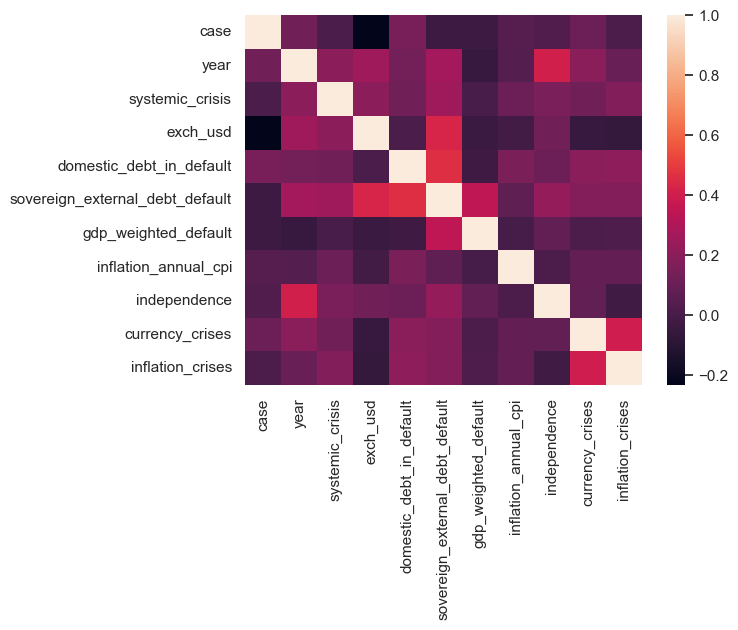

In [42]:
# Correlation Plot

sns.heatmap(data.corr())
